In [10]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
txt1 = '/camp/lab/briscoej/data/STPs/babs/inputs/rory.maizels/asf/PM20195/211019_K00102_0603_AHLV2YBBXY/multiqc/multiqc_data/mqc_fastqc_sequence_counts_plot_1.txt'

df1 = pd.read_csv(txt1, sep='\t')

keep = [d for d in df1.Sample if 'R2' in d]

df1_sub = df1[df1['Sample'].isin(keep)]

s1_dups = df1_sub['Duplicate Reads'] / (df1_sub['Unique Reads'] + df1_sub['Duplicate Reads'])


In [7]:
x = np.array(s1_dups)

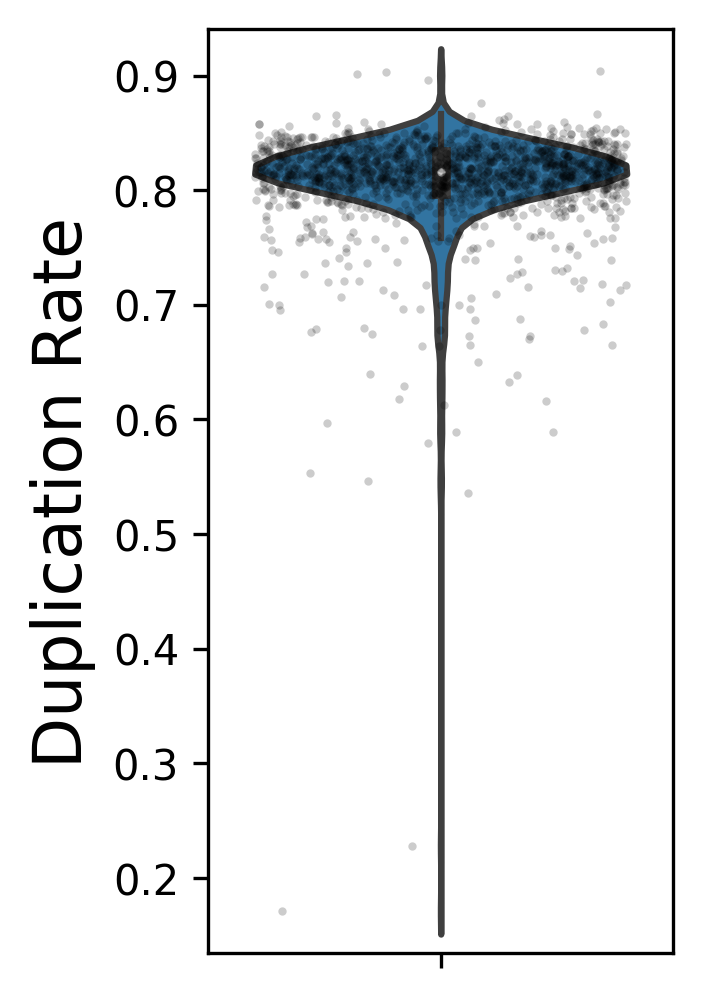

In [84]:
plt.figure(figsize=(2,4), dpi=300)
df = pd.DataFrame(x, columns=['Duplication Rate'])
sns.violinplot(y='Duplication Rate', data=df, color='tab:blue', alpha=0.5, zorder=10)
sns.stripplot(y='Duplication Rate', data=df, color='k', alpha=.2, s=2, jitter=.4, zorder=15)
plt.ylabel("Duplication Rate", fontsize=16)
plt.savefig('scif_pilot1.png', bbox_inches='tight')
plt.show()

In [65]:
scif = '/nemo/lab/briscoej/home/users/maizelr/transcriptomics/SVM23/data/pilot_original_test.h5ad'

adata = sc.read_h5ad(scif)

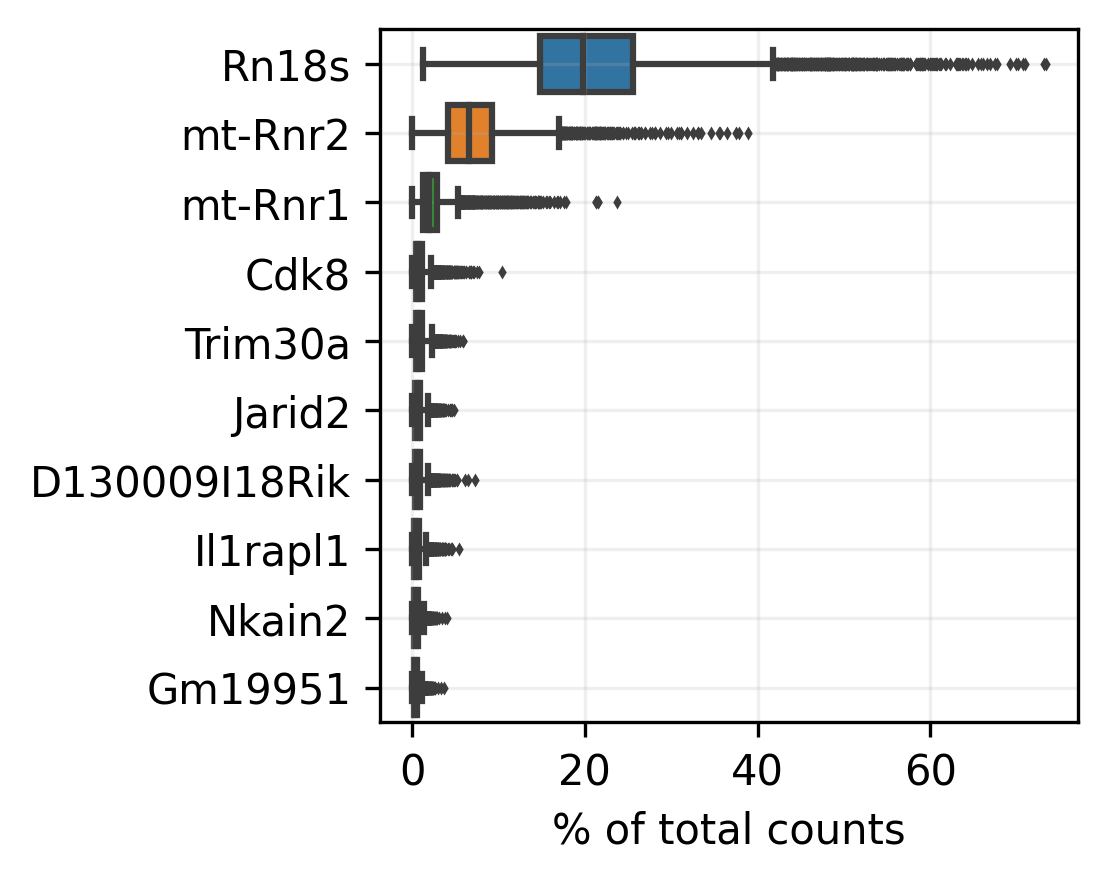

In [105]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.subplots()
sc.pl.highest_expr_genes(adata, n_top=10, ax=ax, show=False)
plt.grid(alpha=0.2)
# plt.xscale('log')
plt.savefig("scif_pilot2.png", bbox_inches='tight')
plt.show()

In [81]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

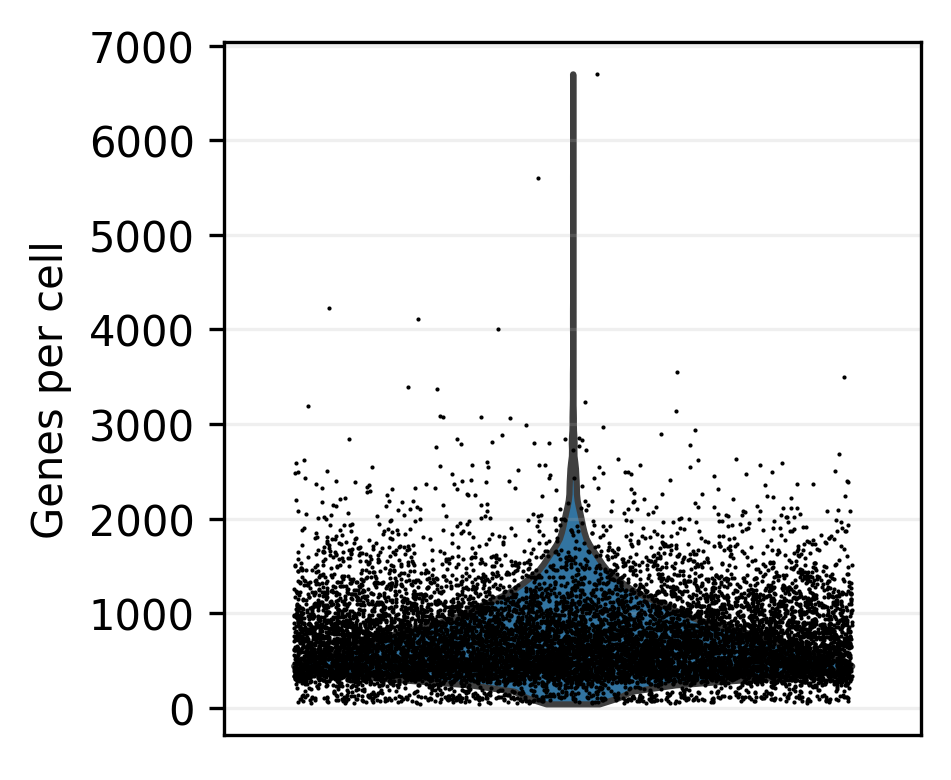

In [137]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.subplots()
sc.pl.violin(adata, ['n_genes_by_counts'],dpi=300,
             jitter=0.4, ax=ax, show=False)
plt.grid(alpha=0.2)
# plt.xscale('log')
plt.ylabel("Genes per cell")
plt.xticks([])
plt.savefig("scif_pilot3.png", bbox_inches='tight')

plt.show()

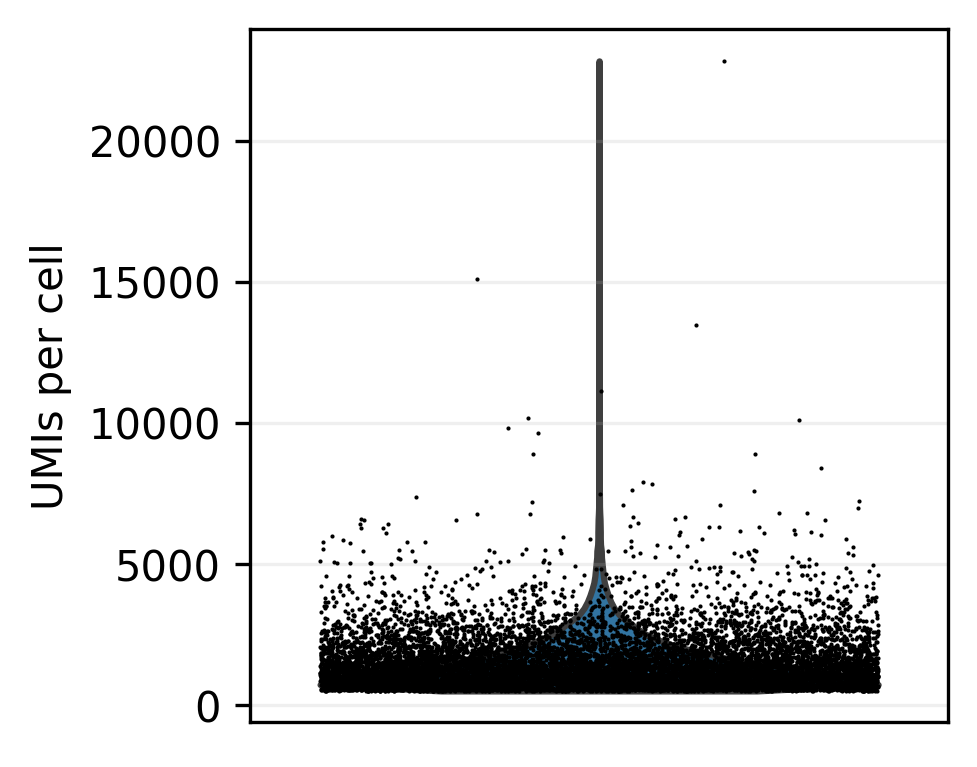

In [138]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.subplots()
sc.pl.violin(adata, ['total_counts'],dpi=300,
             jitter=0.4, ax=ax, show=False)
plt.grid(alpha=0.2)
# plt.xscale('log')
plt.ylabel("UMIs per cell")
plt.xticks([])
plt.savefig("scif_pilot4.png", bbox_inches='tight')

plt.show()

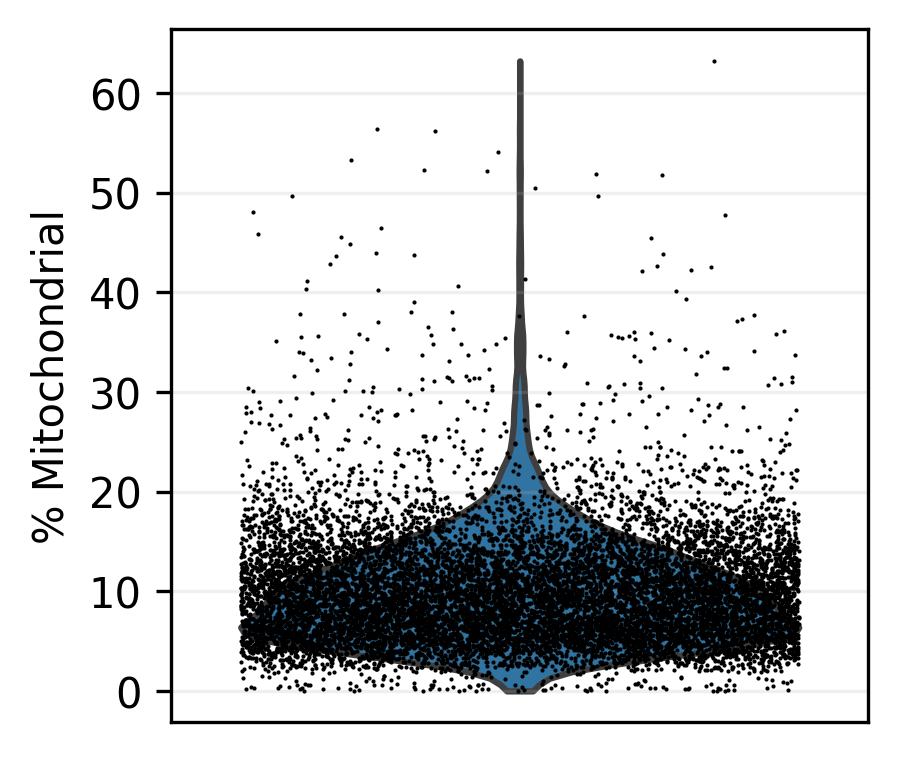

In [139]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.subplots()
sc.pl.violin(adata, ['pct_counts_mt'],dpi=300,
             jitter=0.4, ax=ax, show=False)
plt.grid(alpha=0.2)
# plt.xscale('log')
plt.ylabel("% Mitochondrial")
plt.xticks([])
plt.savefig("scif_pilot5.png", bbox_inches='tight')

plt.show()

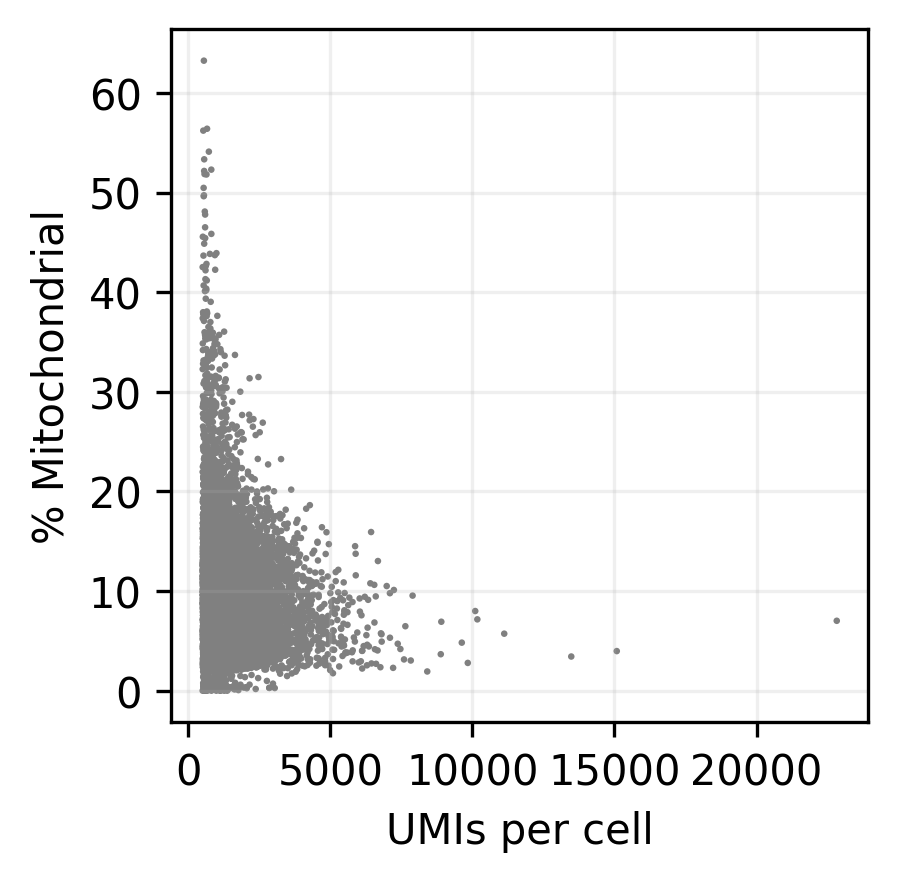

In [140]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.subplots()
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', show=False, ax=ax)

plt.grid(alpha=0.2)
# plt.xscale('log')
plt.ylabel("% Mitochondrial")
plt.xlabel("UMIs per cell")
plt.savefig("scif_pilot6.png", bbox_inches='tight')

plt.show()

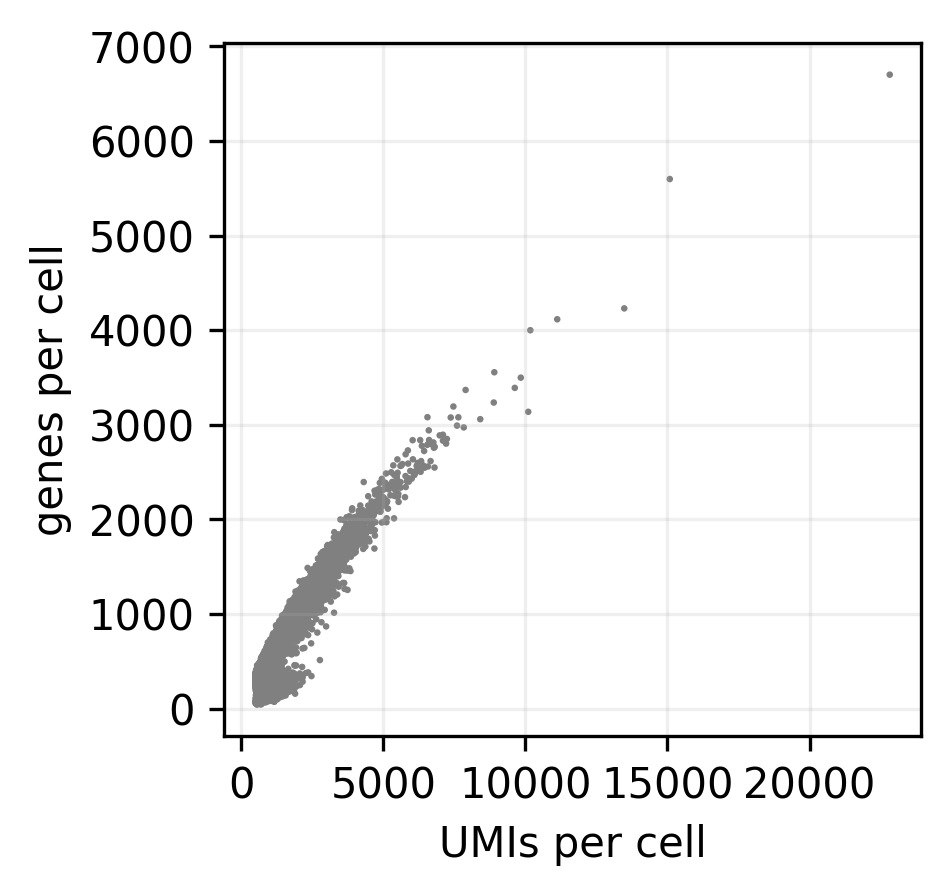

In [141]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.subplots()
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', show=False, ax=ax)

plt.grid(alpha=0.2)
# plt.xscale('log')
plt.ylabel("genes per cell")
plt.xlabel("UMIs per cell")
plt.savefig("scif_pilot7.png", bbox_inches='tight')

plt.show()

In [150]:
adata = sc.read_h5ad(scif)



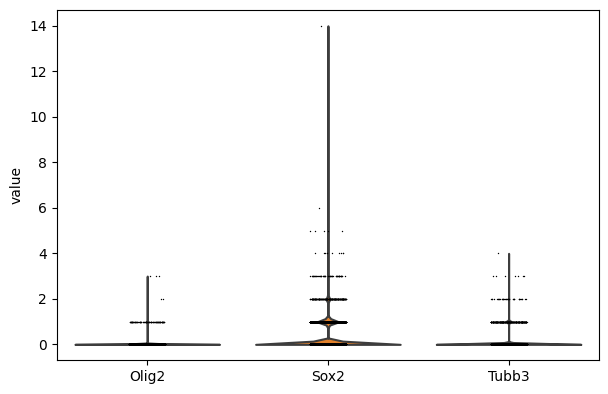

In [153]:
sc.pl.violin(adata, ['Olig2', 'Sox2','Tubb3'])

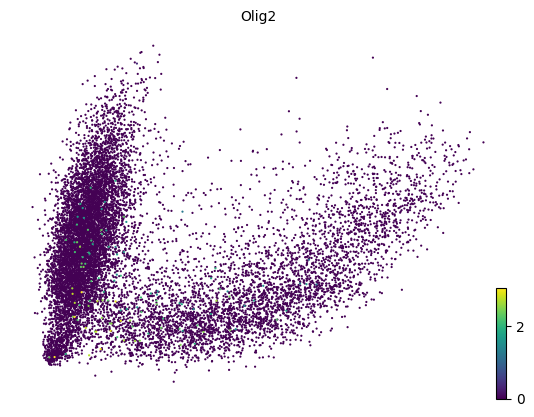

In [149]:
import scvelo as scv


In [128]:
import velvet as vt

Global seed set to 0
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


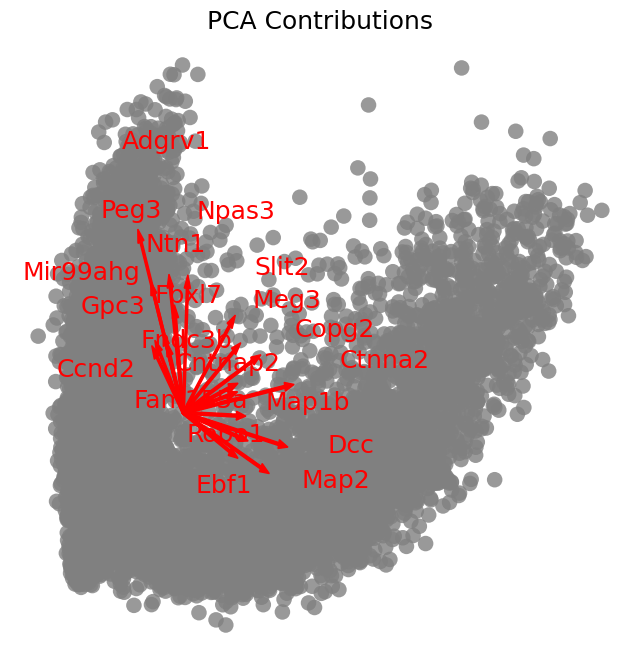

In [132]:
vt.pl.pca_contributions(adata, n_genes=20)